# Предсказание цен на недвижимость

**Бизнес-постановка задачи**

Компании по продаже недвижимости оценивают ее стоимость, используя методы машинного обучения.
Задача оценки цены на недвижимость также может быть нужна для:
* выявления аномально низких цен на недвижимость,
* оценки макроэкономических показателей,
* уточнения ставок по ипотеке

**Постановка задачи анализа данных**

Целью данной задачи является прогнозирование стоимости домов в округе Кинг (штат Вашингтон, США) с помощью построения регрессионных моделей и их анализа. Набор данных состоит из цен на дома в округе Кинг, проданных в период с мая 2014 года по май 2015 года. Данные опубликованы в открытом доступе на платформе Kaggle.

Данные с сайта renthub.com по стоимости квартир для аренды в Сиэтле:

<a href="https://drive.google.com/uc?id=1Dr-p-o5yMi3uIS2kPcUUwT5bH0cCt1Be
" target="_blank"><img src="https://drive.google.com/uc?id=1Dr-p-o5yMi3uIS2kPcUUwT5bH0cCt1Be"
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>


**Обзор доступных данных**

В выборке 21613 наблюдений и 21 переменная.
Таким образом, про каждый из 21613 объектов недвижимости мы знаем значения 21 их характеристики (число спален, оценка состояния риелтором, наличие вида на воду и т.п.)

Выборка была разбита на две части для обучения и для тестирования модели. Данные на обучение и тест обычно делят случайно и равномерно: нужно чтобы и обучающая, и тестовая выборка были похожие на те данные, на которых модель будет использоваться в боевых условиях.

Более сложные разбиения могут использоваться если в данных есть временная компонента - например, мы строим скоринговую модель и для теста откладываем данные за последние несколько месяцев, а всю остальную выборку используем для обучения. Такое разбиение имитирует реальную работу модели: мы можем обучаться только на данных прошлых кредитов, а работать модель уже будет на данных из будущего.

Доли общей выборки для обучения и тестирования обычно 70% и 30% соотвественно. Любые разумные числа подходят, если для обучения используется достаточно много данных (обычно больше 50%), но и для тестирования что-то остается (10% и больше).


Данные содержат два типа переменных:

* Целевая: **Целевая. Цена**
* Остальные переменные: **20 переменных, могут использоваться для прогноза целевой переменной.**

## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки**

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю.
FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.
Поэтому такие предупреждения мы будем игнорировать.
Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'.
Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных.

In [5]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_80271/3469037740.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd


Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах.

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [6]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке
%matplotlib inline

**Шаг 1.2. Загрузим данные**

Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Загружаем данные с помощие команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду %%capture в первой строке.

In [7]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

In [8]:
excel_file_1 = 'predict_house_price_training_data.xlsx'
excel_file_2 = 'predict_house_price_test_data.xlsx'

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название таблицы с данными.

In [9]:
training_data = pd.read_excel(excel_file_1)

*Что важно посмотреть после того, как мы загрузили данные?*
- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *training_data* метод **head()**, который выводит первые 5 строк таблицы.

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [10]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


**Шаг 1.3. Посмотрим на размеры загруженной таблицы**, у которой мы видели только первые 5 строк.

Для этого вызываем поле **shape** у нашей переменной *training_data*. Поле вызывается также как метод, но в конце скобки не ставятся, так как для поля не предусмотрена передача аргументов.  

In [11]:
training_data.shape

(15129, 16)

*Что означает первое и второе число?*

Итак, таблица содержит 15129 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак.
15129 меньше 21613, так как мы пока загрузили только часть данных, которую будем использовать для обучения модели.

Таблицу проверили, теперь можно приступать к обработке данных.

# 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

Анализируем результата выполнения команды:

* 15129 строк (entries)
* 16 столбцов (Data columns)

В данных присутствует всего два типа dtypes:
* int64 - целое число  (12 столбцов)
* float64 - дробное число (4 столбца)

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Так как эти цифры в каждой строчке совпадают с числом строк (15129), то в данных нет пропусков и можно двигаться дальше.

**Шаг 2.2. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать стоимость, поэтому целевая переменная - это цена.

In [13]:
training_values = training_data['Целевая.Цена']

In [14]:
training_points = training_data.drop('Целевая.Цена', axis=1)

Можно посмотреть результаты этих действий, вызвав метод **head()** и поле **shape**, которыми мы пользовались ранее, но сейчас нужно вызывать их от новой переменной *training_points*.

In [15]:
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [16]:
training_points.shape

(15129, 15)

Видно, что столбца действительно нет, а количество строк не изменилось. Данные в 5 первых строках такие же, как были ранее.

##   3. Обучить модель на обучающей выборке


**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов.

* Линейная регрессия *linear regression*




Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Мы импортируем  модуль из этой библиотеки:
 * *linear_model* - тут находятся все линейные модели


In [17]:
from sklearn import linear_model

Прежде чем начать делать ремонт, нужно подготовить инструменты для работы. Аналогично в нашем случае, прежде чем обучать модели, нужно создать их прототипы.  

Чтобы создать модель линейной регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

In [18]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототип  модели, можем его обучить с помощью обучающей выборки.

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента:
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [38]:
linear_regression_model.fit(training_points, training_values)

intercept = linear_regression_model.intercept_
print(f'Intercept: {intercept}')
coefficients = linear_regression_model.coef_
print(f'(b1, b2, ..., b15): {coefficients}')

Intercept: -36263897.49702227
(b1, b2, ..., b15): [-3.37568700e+04  4.31210151e+04  1.15347631e+02 -4.72733343e-02
 -6.33671614e+03  5.91890463e+05  4.97598815e+04  3.21627978e+04
  9.96353171e+04  7.99725608e+01  3.53750699e+01 -2.44905828e+03
  2.45690914e+01  5.70765126e+05 -1.08281940e+05]



* Мы получили обученную модель.
* Теперь необходимо провалидировать модель на новых тестовых данных.

## 4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим и проанализируем тестовые данные.**

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название файла, в котором находится таблица с данными.

In [20]:
test_data = pd.read_excel(excel_file_2)

*Что важно посмотреть, после того, как мы загрузили данные?*

- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *test_data* метод **head()**, который выводит первые 5 строк таблицы.

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [21]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


Посмотрим на размеры загруженной таблицы, так как мы видели только 5 строк

Для этого вызываем поле **shape** у нашей переменной *test_data*. Поле вызывается также как метод, но в конце скобки не ставятся (!), так как для поля не предусмотрена передача аргументов.  

In [22]:
test_data.shape

(6484, 16)

*Что означает первое и второе число?*
Таблица содержит 6484 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак. Также как в учебных данных до обучения.

Таблицу проверили, теперь можно приступать к обработке данных
Действуем аналогично тому, как делали с данными для обучения

Проверим, есть ли в данных пропуски. Для того чтобы это сделать, нужно обратиться вызвать у переменной *test_data* метод **info()**.

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Так как эти цифры в каждой строчке совпадают с числом строк (6484), то в данных нет пропусков.

**Шаг 4.2. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной.

In [24]:
test_values = test_data['Целевая.Цена']

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным.
Для это нужно у переменной *test_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *test_points*. После выполнения запроса *test_points* будет содержать исходную таблицу без целевого столбца.

In [25]:
test_points = test_data.drop('Целевая.Цена', axis=1)

И проверяем результат записанный в test_points

In [26]:
test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [27]:
test_points.shape

(6484, 15)

Видно, что количество столбцов уменьшилось на один. Данные в 5 первых строках такие же, как были ранее.

# 5. Провалидировать модель на тестовой выборке

*1.

Получим прогноз целевой переменной на тестовых данных для модели линейной регрессии .

Для этого вызовем  метод **predict()**, в качестве аргумента передадим *test_points*.

In [28]:
test_predictions_linear = linear_regression_model.predict(test_points)

Качество регрессионных моделей оценим двумя способами:
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества

Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки.


In [29]:
%matplotlib inline

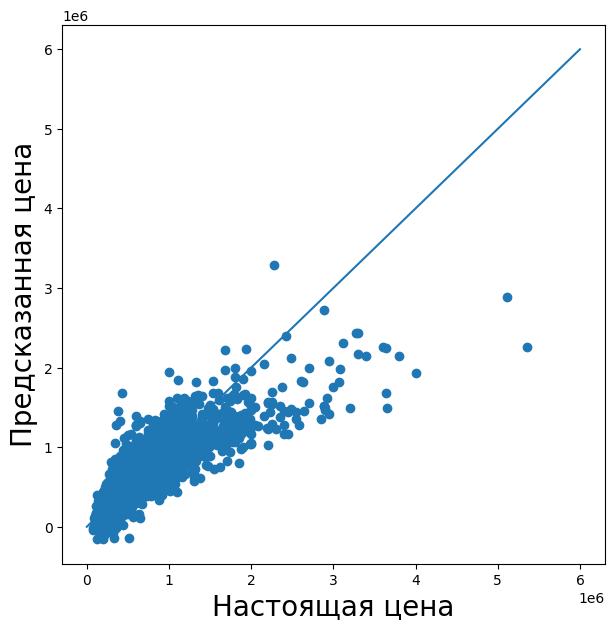

In [30]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки **sklearn**.

Мы используем две метрики качества:
 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Подсчитаем ошибки для линейной модели.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_linear*.

In [32]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

Теперь напечатаем полученные ошибки. Обычно смотрят на корень из среднеквадратичной ошибки, RMSE. Чтобы извлечь корень нам понадобится библиотека **Numpy**. С помощью неё можно быстро производить вычисления сразу над массивами чисел.

In [34]:
import numpy as np

print(f"MAE: {mean_absolute_error_linear_model:7.2f}, RMSE: {np.sqrt(mean_squared_error_linear_model):7.2f} для модели линейной регрессии")

MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии


# Обзор результатов

В этом ноутбуке мы научились
0. Загружать библиотеки, необходимые для работы.
1. Загрузить данные для обучения, представленные в формате excel таблицы.
2. Проводить предрватилельную обработку данных перед построением и использованием модели машинного обучения: смотреть на части таблицы, понимать, какой размер у выборки данных, выделять отдельные столбцы таблицы в новые таблицы.
3. Обучать модель линейной регрессии  на обучающей выборке.
4. Валидировать модель на тестовой выборке с помощью кросс-плота для модели и реальных значений, стандартных ошибок модели.